In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/ECE225A HW/Project/archive.zip')

In [ ]:
df_raw.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [ ]:
df_raw.shape

(1836, 11)

# Correlation Analysis and Visualization:

*   Create correlation matrices and visualizations to show relationships
between different variables.

*   Explore how the key features such as ratings, storage (ROM), camera
specifications, etc. correlate with the price of mobile phones.
*   Use histograms, box plots, and scatter plots to identify patterns and trends.



In [ ]:
df_raw.iloc[494]

Phone Name           APPLE iPhone 13 (Green, 512 GB)
Rating ?/5                                       4.7
Number of Ratings                           2,24,309
RAM                                       512 GB ROM
ROM/Storage                                      NaN
Back/Rare Camera                         12MP + 12MP
Front Camera                       12MP Front Camera
Battery                                      A15 mAh
Processor                  Brand Warranty for 1 Year
Price in INR                                 ₹81,999
Date of Scraping                          2023-06-17
Name: 494, dtype: object

In [ ]:
def clean_and_preprocessing_data(df_raw):
    df = df_raw.copy()

    # Data Cleaning and Preprocessing
    # Convert Number of Ratings to numeric
    df["Number of Ratings"] = df["Number of Ratings"].str.replace(",", "").astype(int)

    # Correct 'RAM' and 'ROM/Storage' columns
    mask_rom = df['RAM'].notna() & df['RAM'].astype(str).str.endswith('ROM')
    df.loc[mask_rom, 'ROM/Storage'] = df.loc[mask_rom, 'RAM']
    df.loc[mask_rom, 'RAM'] = np.nan

    # Correct 'Battery' column
    mask_bat = df['Battery'].astype(str).str.startswith('A') # (A15 mAh)
    df.loc[mask_bat, 'Battery'] = np.nan

    # Convert "RAM", "Battery" and "ROM/Storage" to numeric
    df[["RAM GB", "ROM/Storage GB", "Battery mAh"]] = df[["RAM", "ROM/Storage", "Battery"]].apply(lambda x: pd.to_numeric(x.str.extract('(\d+)', expand=False), errors='coerce'))
    df.loc[df['Battery mAh'] < 1000, ['Battery','Battery mAh']] = np.nan

    contains_TB = df['ROM/Storage'].astype(str).str.contains('TB')
    df.loc[contains_TB, 'ROM/Storage GB'] *= 1000

    # Extract Megapixels from Camera columns
    contains_mp = df['Back/Rare Camera'].astype(str).str.contains('MP')
    df.loc[~contains_mp, 'Back/Rare Camera'] = np.nan

    df["Back/Rare Camera MP"] = df["Back/Rare Camera"].str.extract('(\d+)').astype(float)
    df["Front Camera MP"] = df["Front Camera"].str.extract('(\d+)').astype(float)

    # Convert Price to numeric
    df["Price in INR"] = df["Price in INR"].str.replace("₹", "").replace(",", "", regex=True).astype(float)

    # Convert Date of Scraping to datetime
    df["Date of Scraping"] = pd.to_datetime(df["Date of Scraping"])

    return df

In [ ]:
df = clean_and_preprocessing_data(df_raw)

<ipython-input-47-1cb30f53f071>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


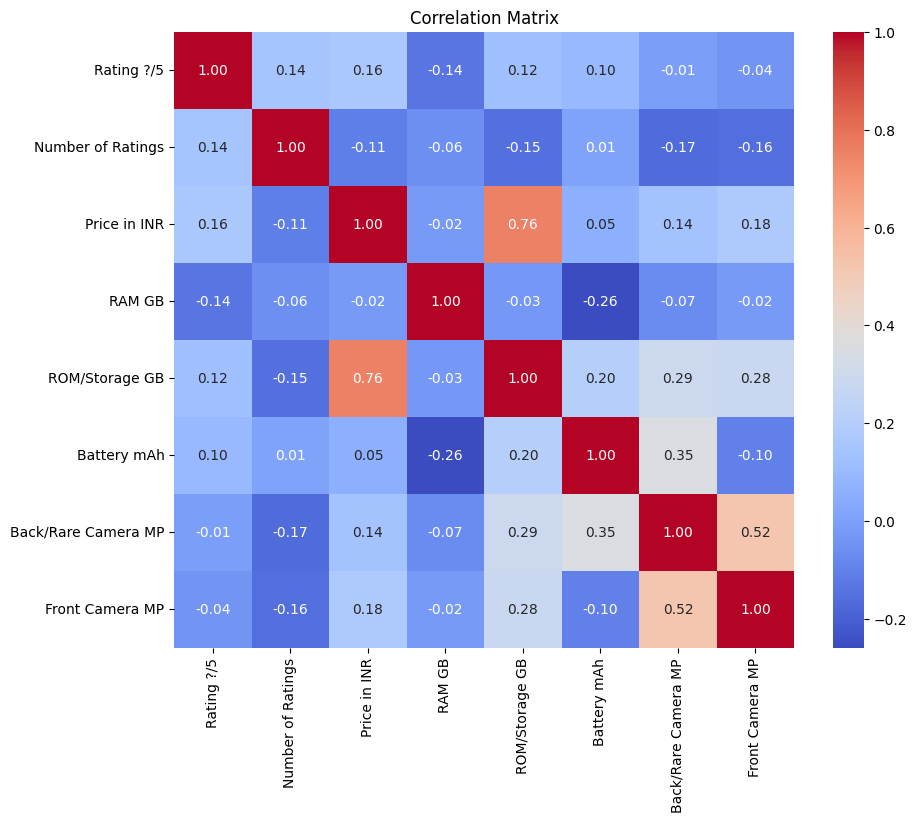

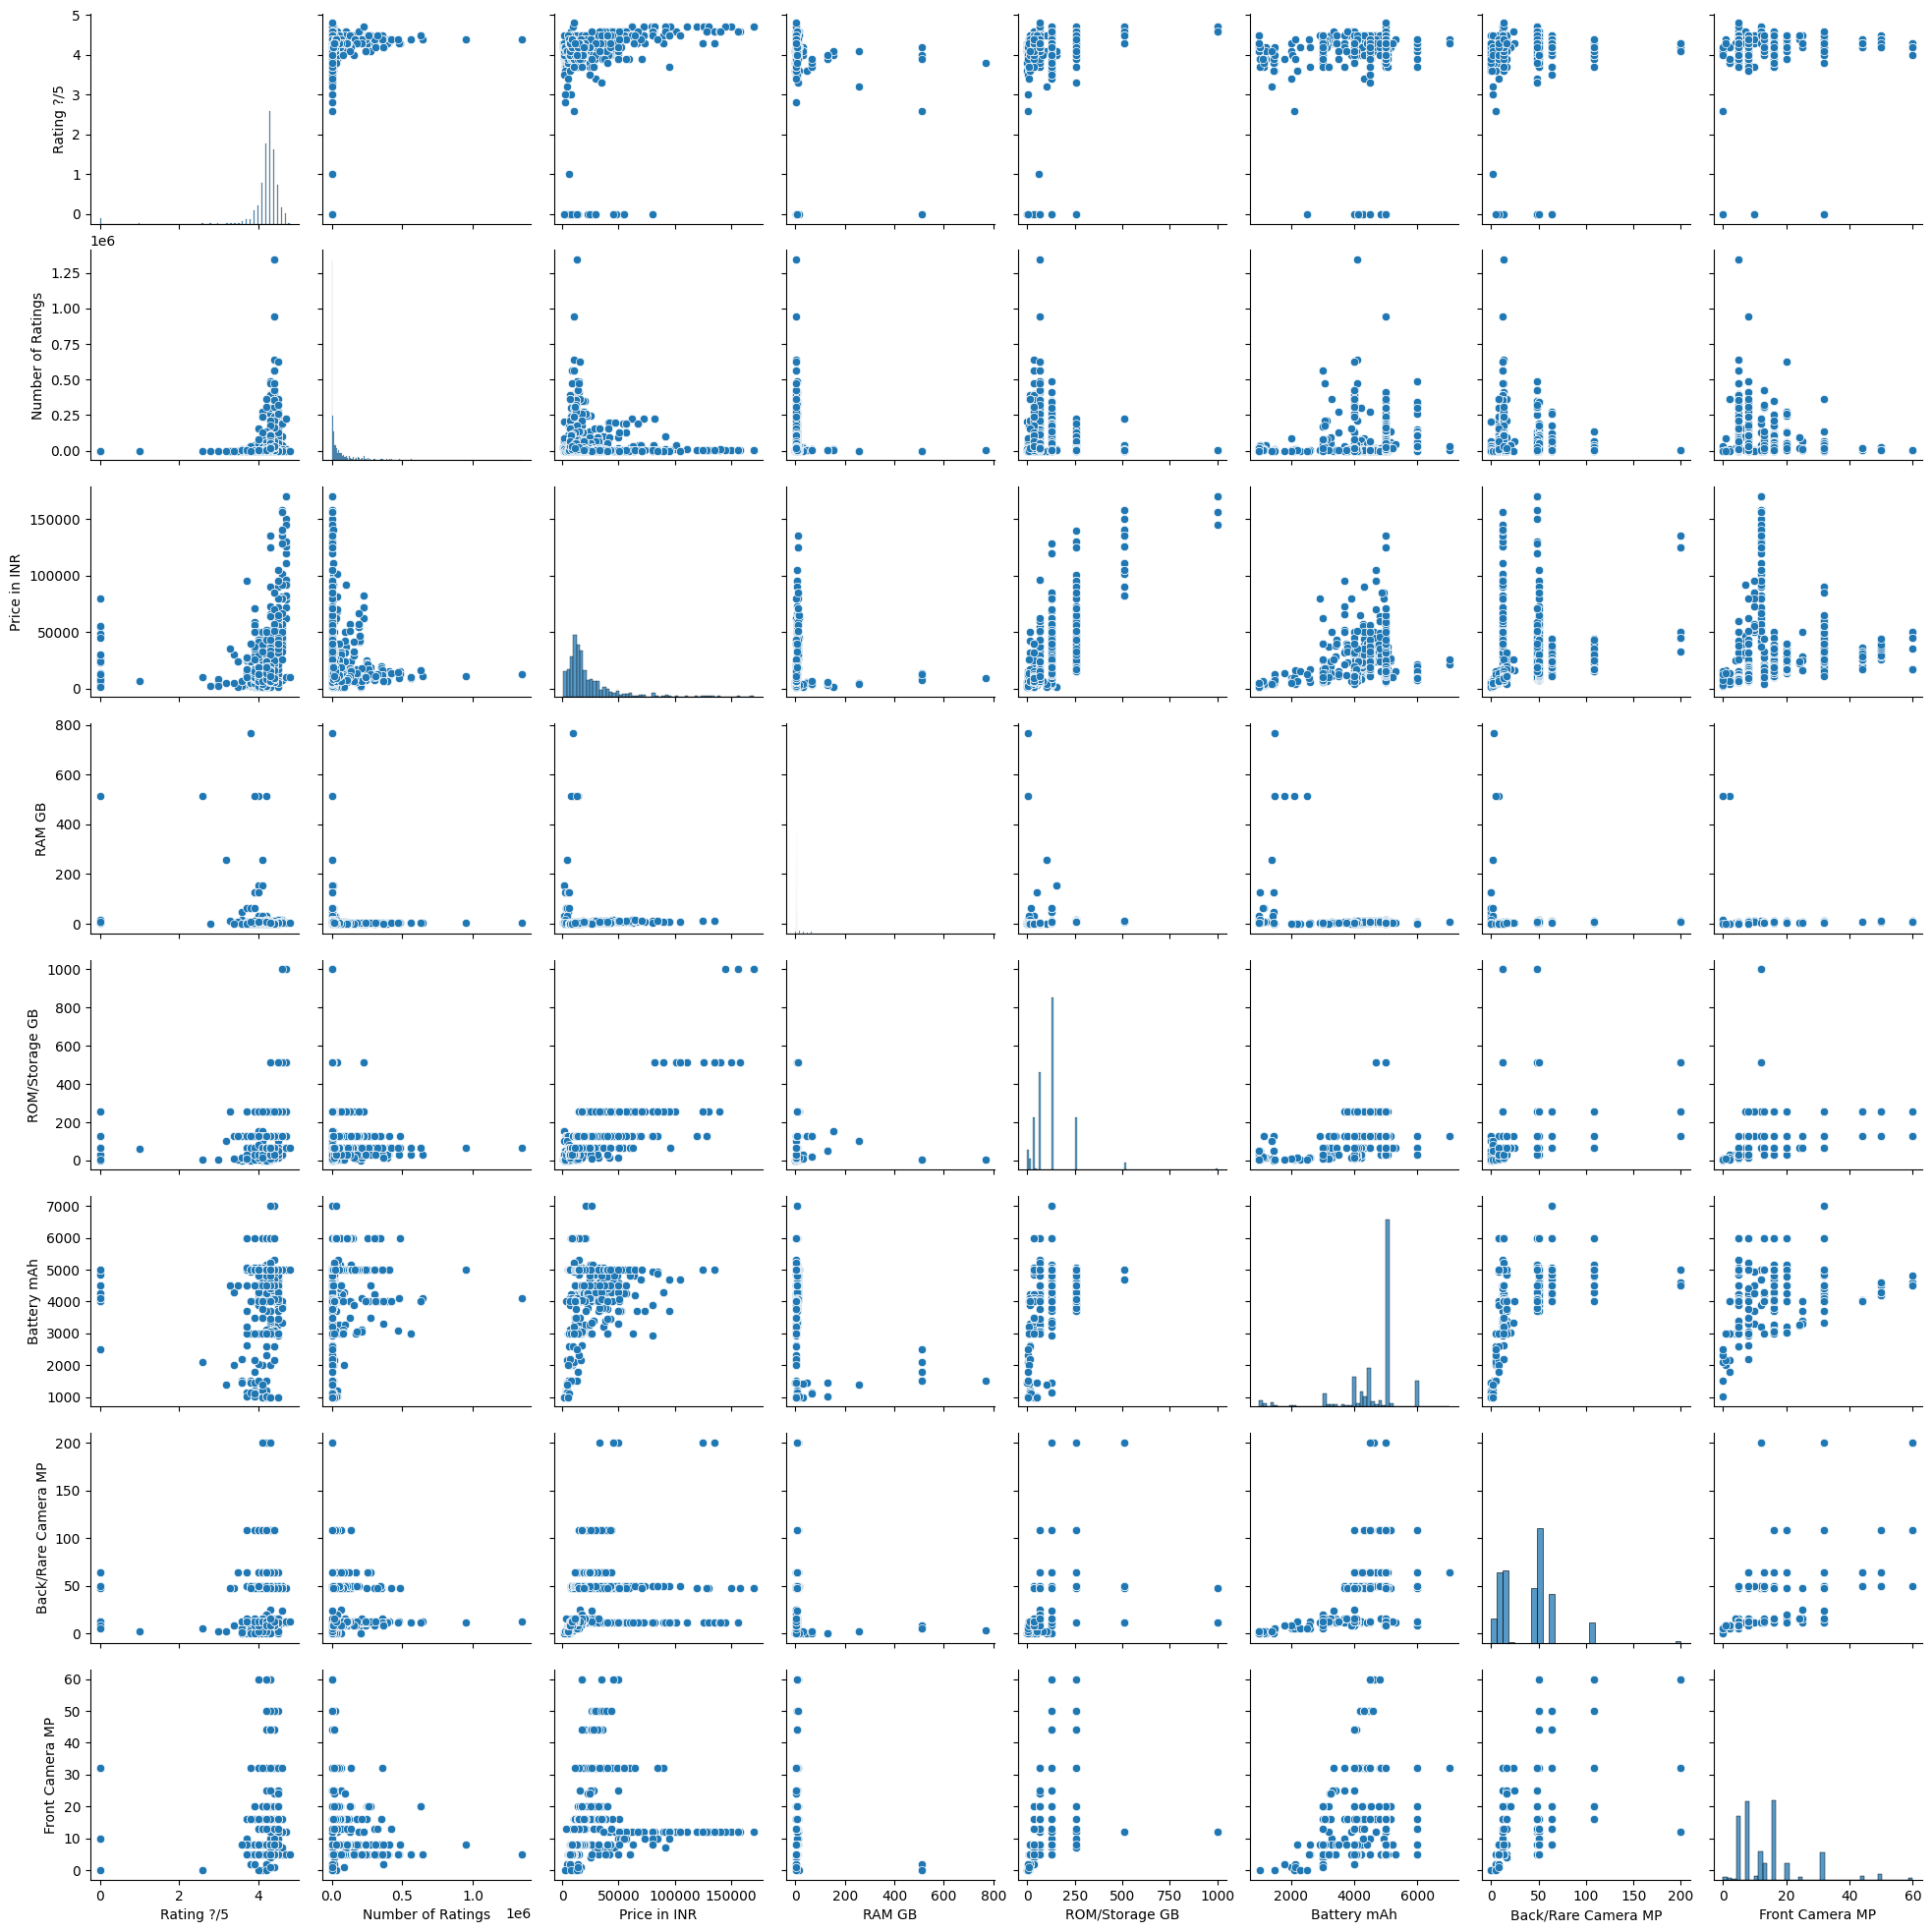

In [ ]:
def get_correlation(df):
    # Calculate correlation matrix
    correlation_matrix = df.corr()

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

    # # Pairplot for Selected Variables
    # selected_vars = ['Rating ?/5', 'Number of Ratings',
    #    'Price in INR', 'RAM GB', 'ROM/Storage GB',
    #    'Battery mAh', 'Back/Rare Camera MP', 'Front Camera MP']
    # sns.pairplot(df[selected_vars])
    # plt.show()

    return correlation_matrix

correlation_matrix = get_correlation(df)

In [ ]:
correlation_matrix

,Rating ?/5,Number of Ratings,Price in INR,RAM GB,ROM/Storage GB/TB,Battery mAh,Back/Rare Camera MP,Front Camera MP
Rating ?/5,1.000000,0.144971,0.164694,-0.140683,0.121455,0.098404,-0.006640,-0.038964
Number of Ratings,0.144971,1.000000,-0.107356,-0.057697,-0.154076,0.009725,-0.168280,-0.156261
Price in INR,0.164694,-0.107356,1.000000,-0.018038,0.758835,0.053084,0.135617,0.176459
RAM GB,-0.140683,-0.057697,-0.018038,1.000000,-0.030657,-0.258806,-0.069442,-0.018905
ROM/Storage GB/TB,0.121455,-0.154076,0.758835,-0.030657,1.000000,0.204374,0.287179,0.280761
Battery mAh,0.098404,0.009725,0.053084,-0.258806,0.204374,1.000000,0.351619,-0.102807
Back/Rare Camera MP,-0.006640,-0.168280,0.135617,-0.069442,0.287179,0.351619,1.000000,0.519044
Front Camera MP,-0.038964,-0.156261,0.176459,-0.018905,0.280761,-0.102807,0.519044,1.000000


# Probability Modeling:
Utilize conditional probability to assess the likelihood of specific features
given certain price conditions.

In [ ]:
# Define a function to calculate conditional probability
def conditional_probability_given_price(feature, condition, df):
    total_count = len(df)
    condition_count = len(df[df['PriceCategory'] == condition])
    feature_condition_count = len(df[(df['PriceCategory'] == condition) & (df[feature]== True)])

    # Calculate conditional probability
    return feature_condition_count / condition_count if condition_count > 0 else 0

def conditional_probability(feature, con_feat, df):
    total_count = len(df)
    condition_count = len(df[df[con_feat] >= df[con_feat].quantile(0.75)])
    if (feature == 'High') or (feature =='Low'): #'PriceCategory'
        feature_condition_count = len(df[(df[con_feat] >= df[con_feat].quantile(0.75)) & (df['PriceCategory'] == feature)])
    else:
        feature_condition_count = len(df[(df[con_feat] >= df[con_feat].quantile(0.75)) & (df[feature] >= df[con_feat].quantile(0.75))])
    # Calculate conditional probability
    return feature_condition_count / condition_count if condition_count > 0 else 0

In [ ]:
# def get_conditional_probability(df):
# Categorize prices into bins (e.g., low, medium, high)
price_bins = [0, 15999, 27990, float('inf')]
price_labels = ['Low', 'Medium', 'High']
df['PriceCategory'] = pd.cut(df['Price in INR'], bins=price_bins, labels=price_labels, right=False)

# ----- Probabilities Given High Price -----

# Define 'High RAM' as RAM sizes above 8 GB (df['RAM GB'].quantile(0.75))
df['HighRAM'] = df['RAM GB'] >= 8
# Example: Calculate P(High RAM | High Price)
p_high_ram_given_high_price = conditional_probability_given_price('HighRAM', 'High', df)
print(f"P(High RAM | High Price) = {p_high_ram_given_high_price:.2%}")

# Define 'High Storage' as storage sizes above 128 GB (df['ROM/Storage GB'].quantile(0.75))
df['HighStorage'] = df['ROM/Storage GB'] >= 128
# Calculate P(High Storage | High Price)
p_high_storage_given_high_price = conditional_probability_given_price('HighStorage', 'High', df)
print(f"P(High Storage | High Price) = {p_high_storage_given_high_price:.2%}")

# Define 'High BackCamera' as Back/Rare Camera MP above 50 MP (df['Back/Rare Camera MP'].quantile(0.75))
df['HighBackCamera'] = df['Back/Rare Camera MP'] >= 50
# Calculate P(High BackCamera | High Price)
p_high_BackCamera_given_high_price = conditional_probability_given_price('HighBackCamera', 'High', df)
print(f"P(High BackCamera | High Price) = {p_high_BackCamera_given_high_price:.2%}")

# Define 'High FrontCamera' as Front Camera MP above 16 MP (df['Front Camera MP'].quantile(0.75))
df['HighFrontCamera'] = df['Front Camera MP'] >= 16
# Calculate P(High FrontCamera | High Price)
p_high_FrontCamera_given_high_price = conditional_probability_given_price('HighFrontCamera', 'High', df)
print(f"P(High FrontCamera | High Price) = {p_high_FrontCamera_given_high_price:.2%}")


# ----- Probabilities of High Price given other conditions -----
p_high_price_given_high_FrontCamera = conditional_probability('High', 'Front Camera MP', df)
print(f"P(High Price | High FrontCamera) = {p_high_price_given_high_FrontCamera:.2%}")

p_high_price_given_high_BackCamera = conditional_probability('High', 'Back/Rare Camera MP', df)
print(f"P(High Price | High BackCamera) = {p_high_price_given_high_BackCamera:.2%}")

p_high_price_given_high_Storage = conditional_probability('High', 'ROM/Storage GB', df)
print(f"P(High Price | High Storage) = {p_high_price_given_high_Storage:.2%}")

p_high_price_given_high_RAM = conditional_probability('High', 'RAM GB', df)
print(f"P(High Price | High RAM) = {p_high_price_given_high_RAM:.2%}")

p_high_price_given_high_rating = conditional_probability('High', 'Rating ?/5', df)
print(f"P(High Price | High Rating) = {p_high_price_given_high_rating:.2%}")

p_low_price_given_high_num_of_rating = conditional_probability('Low', 'Number of Ratings', df)
print(f"P(Low Price | High Number of Ratings) = {p_low_price_given_high_num_of_rating:.2%}")

p_high_BackCamera_given_high_Storage = conditional_probability('Back/Rare Camera MP', 'ROM/Storage GB', df)
print(f"P(High BackCamera | High Storage) = {p_high_price_given_high_Storage:.2%}")

p_high_FrontCamera_given_high_BackCamera = conditional_probability('Front Camera MP', 'Back/Rare Camera MP', df)
print(f"P(High FrontCamera | High BackCamera) = {p_high_FrontCamera_given_high_BackCamera:.2%}")

P(High RAM | High Price) = 63.54%
P(High Storage | High Price) = 92.54%
P(High BackCamera | High Price) = 48.19%
P(High FrontCamera | High Price) = 36.67%
P(High Price | High FrontCamera) = 29.10%
P(High Price | High BackCamera) = 28.07%
P(High Price | High Storage) = 43.01%
P(High Price | High RAM) = 51.47%
P(High Price | High Rating) = 40.66%
P(Low Price | High Number of Ratings) = 64.78%
P(High BackCamera | High Storage) = 43.01%
P(High FrontCamera | High BackCamera) = 3.85%


# Regression Modeling:
Implement regression model to predict mobile phone prices based on
selected features. Evaluate the predictive performance of the model and
assess the impact of each feature on price variations.

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

df_clean = df.dropna()

In [287]:
# Baseline Linear Regression Model
X = df_clean[['ROM/Storage GB', 'RAM GB']]
y = df_clean['Price in INR']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model_base = LinearRegression()
model_base.fit(X_train, y_train)

# Make predictions on the test set
y_pred_base= model_base.predict(X_test)

# Evaluate the model
mse_base = mean_squared_error(y_test, y_pred_base)
r2_base = r2_score(y_test, y_pred_base)

print(f'Mean Squared Error: {mse_base}')
print(f'R^2 Score: {r2_base}')

Mean Squared Error: 156148544.0979088
R^2 Score: 0.42787574324963884


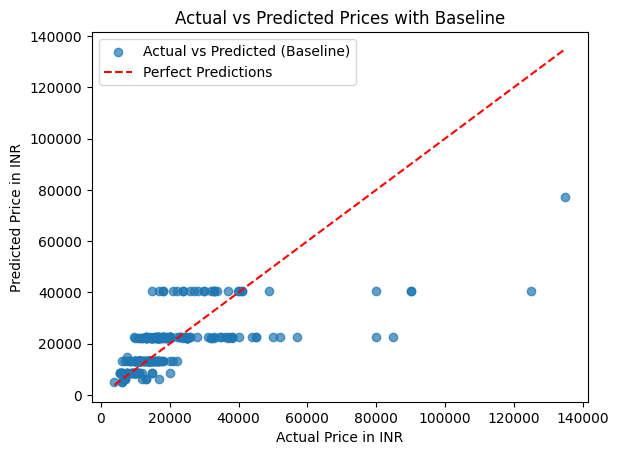

In [288]:
# Scatter plot of actual vs predicted values for Linear Regression
plt.scatter(y_test, y_pred_base, label='Actual vs Predicted (Baseline)', alpha=0.7)
plt.xlabel('Actual Price in INR')
plt.ylabel('Predicted Price in INR')

# Add a diagonal line to represent perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Predictions')

plt.title('Actual vs Predicted Prices with Baseline')
plt.legend()
plt.show()

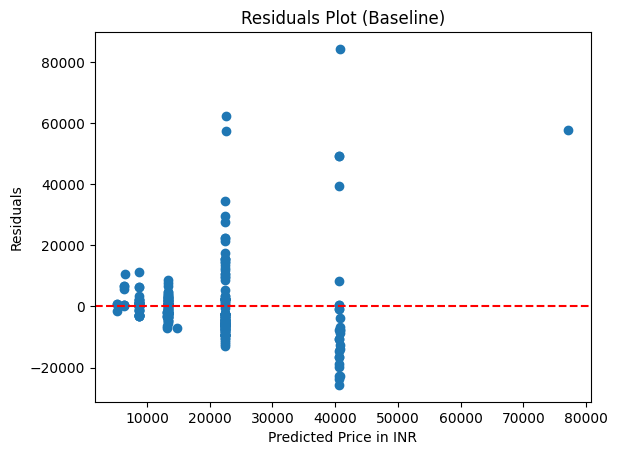

In [289]:
# Calculate residuals
residuals = y_test - y_pred_base

# Plot residuals
plt.scatter(y_pred_base, residuals)
plt.xlabel('Predicted Price in INR')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Baseline)')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

## one-hot encoding of brands

In [295]:
df_clean['Brand'] = df_clean['Phone Name'].str.split().str.get(0)
df_clean_encoded = pd.get_dummies(df_clean, columns=['Brand'], prefix='Brand')

# Select features and target variable
X = df_clean_encoded[['ROM/Storage GB', 'RAM GB'] + list(df_clean_encoded.filter(regex='Brand_'))]
y = df_clean_encoded['Price in INR']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-295-36f3472c2a3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Brand'] = df_clean['Phone Name'].str.split().str.get(0)


In [291]:
# Linear Regression
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_brand = model.predict(X_test)

# Evaluate the model
mse_brand = mean_squared_error(y_test, y_pred_brand)
r2_brand = r2_score(y_test, y_pred_brand)

print(f'Mean Squared Error for model with brands: {mse_brand}')
print(f'R^2 Score for model with brands: {r2_brand}')


# Polynomial Regression
# Apply polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and train the model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error for Polynomial Regression: {mse_poly}')
print(f'R^2 Score Polynomial Regression: {r2_poly}')

Mean Squared Error for model with brands: 123468499.75329939
R^2 Score for model with brands: 0.5476145867287366
Mean Squared Error for Polynomial Regression: 82749056.87937258
R^2 Score Polynomial Regression: 0.6968095800226008


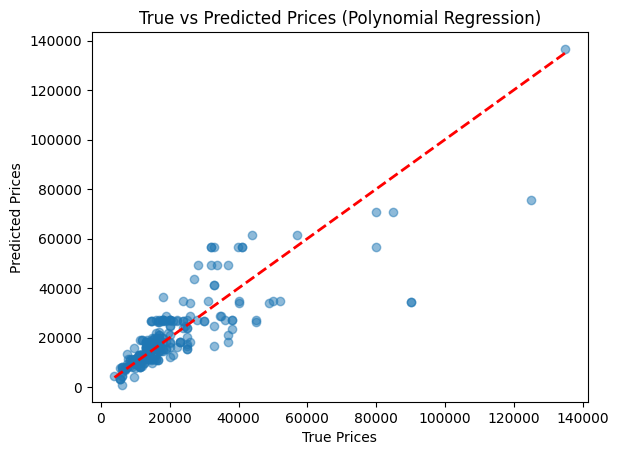

In [292]:
# Plot the true vs predicted values with a diagonal line
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)

plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices (Polynomial Regression)')

plt.show()

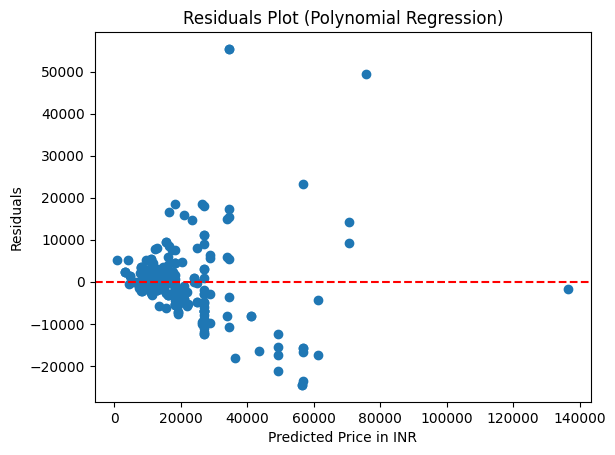

In [293]:
# Calculate residuals
residuals = y_test - y_pred_poly

# Plot residuals
plt.scatter(y_pred_poly, residuals)
plt.xlabel('Predicted Price in INR')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Polynomial Regression)')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

## models for ratings

In [299]:
# Baseline Linear Regression Model
X = df_clean[['Number of Ratings', 'ROM/Storage GB']]
y = df_clean['Rating ?/5']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model_ratings = LinearRegression()
model_ratings.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ratings= model_ratings.predict(X_test)

# Evaluate the model
mse_ratings = mean_squared_error(y_test, y_pred_ratings)
r2_ratings = r2_score(y_test, y_pred_ratings)

print(f'Mean Squared Error of rating model: {mse_ratings}')
print(f'R^2 Score of rating model: {r2_ratings}')

Mean Squared Error of rating model: 0.1632746368411941
R^2 Score of rating model: 0.0054864990912602
